# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [1]:
# Passo 1: Entendimento do Desafio
# Passo 2: Entendimento da Área/Empresa
    # Prever o preço  de um barco baseado nas características dele: ano, material, usado/novo, etc.
    
# Passo 3: Extração/Obtenção de Dados
import pandas as pd

tabela = pd.read_csv("barcos_ref.csv")
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [2]:
# Passo 4: Ajuste de Dados (Tratamento/Limpeza)
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


<function matplotlib.pyplot.show(close=None, block=None)>

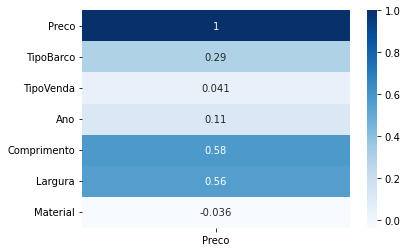

In [7]:
# Passo 5: Análise Exploratória
# Correlação entre as informações da base de dados
import seaborn as sns
import matplotlib.pyplot as plt

correlacao = tabela.corr()[["Preco"]] 
display(correlacao)

sns.heatmap(correlacao, cmap="Blues", annot=True)
plt.show

In [16]:
# Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
    # Dividir a base em X e Y

y = tabela["Preco"] # Objetivo
x = tabela.drop("Preco", axis=1) # Características do produto

# train test split
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [23]:
# Importar a IA
# Regressão Linear e Árvore de Decisão
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar a IA
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinar a IA
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [24]:
# Passo 7: Interpretação de Resultados

# Escolher o melhor modelo -> R²
from sklearn.metrics import r2_score

previsao_rl = modelo_regressaolinear.predict(x_teste)
previsao_ad = modelo_arvoredecisao.predict(x_teste)

print(r2_score(y_teste, previsao_rl))
print(r2_score(y_teste, previsao_ad))

0.4202131939857383
0.8541666396551997


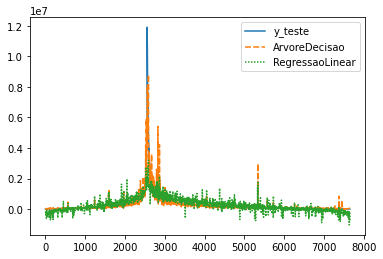

In [25]:
# Visualizar as previsões
viz = pd.DataFrame()
viz["y_teste"] = y_teste
viz["ArvoreDecisao"] = previsao_ad
viz["RegressaoLinear"] = previsao_rl

sns.lineplot(data=viz)
plt.show()

In [31]:
# Fazer novas previsões (usando a IA na prática)
tabela_nova = pd.read_csv("novos_barcos.csv")
display(tabela_nova)

previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 7738.38583333 12429.05       12987.2       ]
